In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix,r2_score
plt.style.use ("dark_background")

In [2]:
dataset = pd.read_csv("lending_club_loan_dataset.csv")
dataset

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000.0,0,9,RENT,18.36,debt_consolidation,36 months,1,NaN,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,0,2,MORTGAGE,23.22,major_purchase,36 months,0,NaN,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,0,5,MORTGAGE,13.27,debt_consolidation,36 months,1,NaN,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,0,2,MORTGAGE,12.84,debt_consolidation,36 months,0,NaN,47.4,0.0,0.822980,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [4]:
dataset.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000000,20000.000000,20000.00000,19846.000000,20000.000000,574.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,7.590662e+06,73349.578350,0.112500,6.82140,16.587841,0.546600,0.759582,55.958148,0.290622,0.504430,0.20000
std,1.609593e+06,45198.567255,0.315989,3.77423,7.585812,0.497836,0.427710,42.117456,3.108654,0.287720,0.40001
min,5.860400e+05,8412.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,6.206283e+06,47000.000000,0.000000,3.00000,10.852500,0.000000,1.000000,38.800000,0.000000,0.257356,0.00000
50%,7.378896e+06,65000.000000,0.000000,7.00000,16.190000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,8.766235e+06,88000.000000,0.000000,11.00000,22.060000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,1.145464e+07,1000000.000000,1.000000,11.00000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


In [5]:
dataset.isna().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

In [6]:
dataset.corr()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
id,1.000000,0.017971,0.015413,0.003863,0.006407,-0.034091,-0.051439,-0.006106,-0.014203,0.000465,-0.037307
annual_inc,0.017971,1.000000,-0.099317,0.118024,-0.230219,-0.080378,0.023281,0.016951,0.014713,-0.004953,-0.092402
short_emp,0.015413,-0.099317,1.000000,-0.582580,0.002013,0.030880,0.072290,-0.011014,0.010424,-0.005309,0.037186
emp_length_num,0.003863,0.118024,-0.582580,1.000000,0.009369,-0.053371,-0.158177,0.027390,-0.012382,0.004446,-0.041420
dti,0.006407,-0.230219,0.002013,0.009369,1.000000,0.030379,0.004079,0.098673,0.011072,0.005571,0.141884
last_delinq_none,-0.034091,-0.080378,0.030880,-0.053371,0.030379,1.000000,0.603267,0.013373,-0.011000,-0.001996,0.021494
last_major_derog_none,-0.051439,0.023281,0.072290,-0.158177,0.004079,0.603267,1.000000,-0.027597,-0.086395,0.050211,-0.013770
revol_util,-0.006106,0.016951,-0.011014,0.027390,0.098673,0.013373,-0.027597,1.000000,0.008435,-0.008228,0.053682
total_rec_late_fee,-0.014203,0.014713,0.010424,-0.012382,0.011072,-0.011000,-0.086395,0.008435,1.000000,-0.002354,0.130233
od_ratio,0.000465,-0.004953,-0.005309,0.004446,0.005571,-0.001996,0.050211,-0.008228,-0.002354,1.000000,0.000403


In [7]:
dataset.nunique()

id                       20000
grade                        7
annual_inc                2566
short_emp                    2
emp_length_num              12
home_ownership               3
dti                       3295
purpose                     12
term                         3
last_delinq_none             2
last_major_derog_none        2
revol_util                1030
total_rec_late_fee         166
od_ratio                 20000
bad_loan                     2
dtype: int64

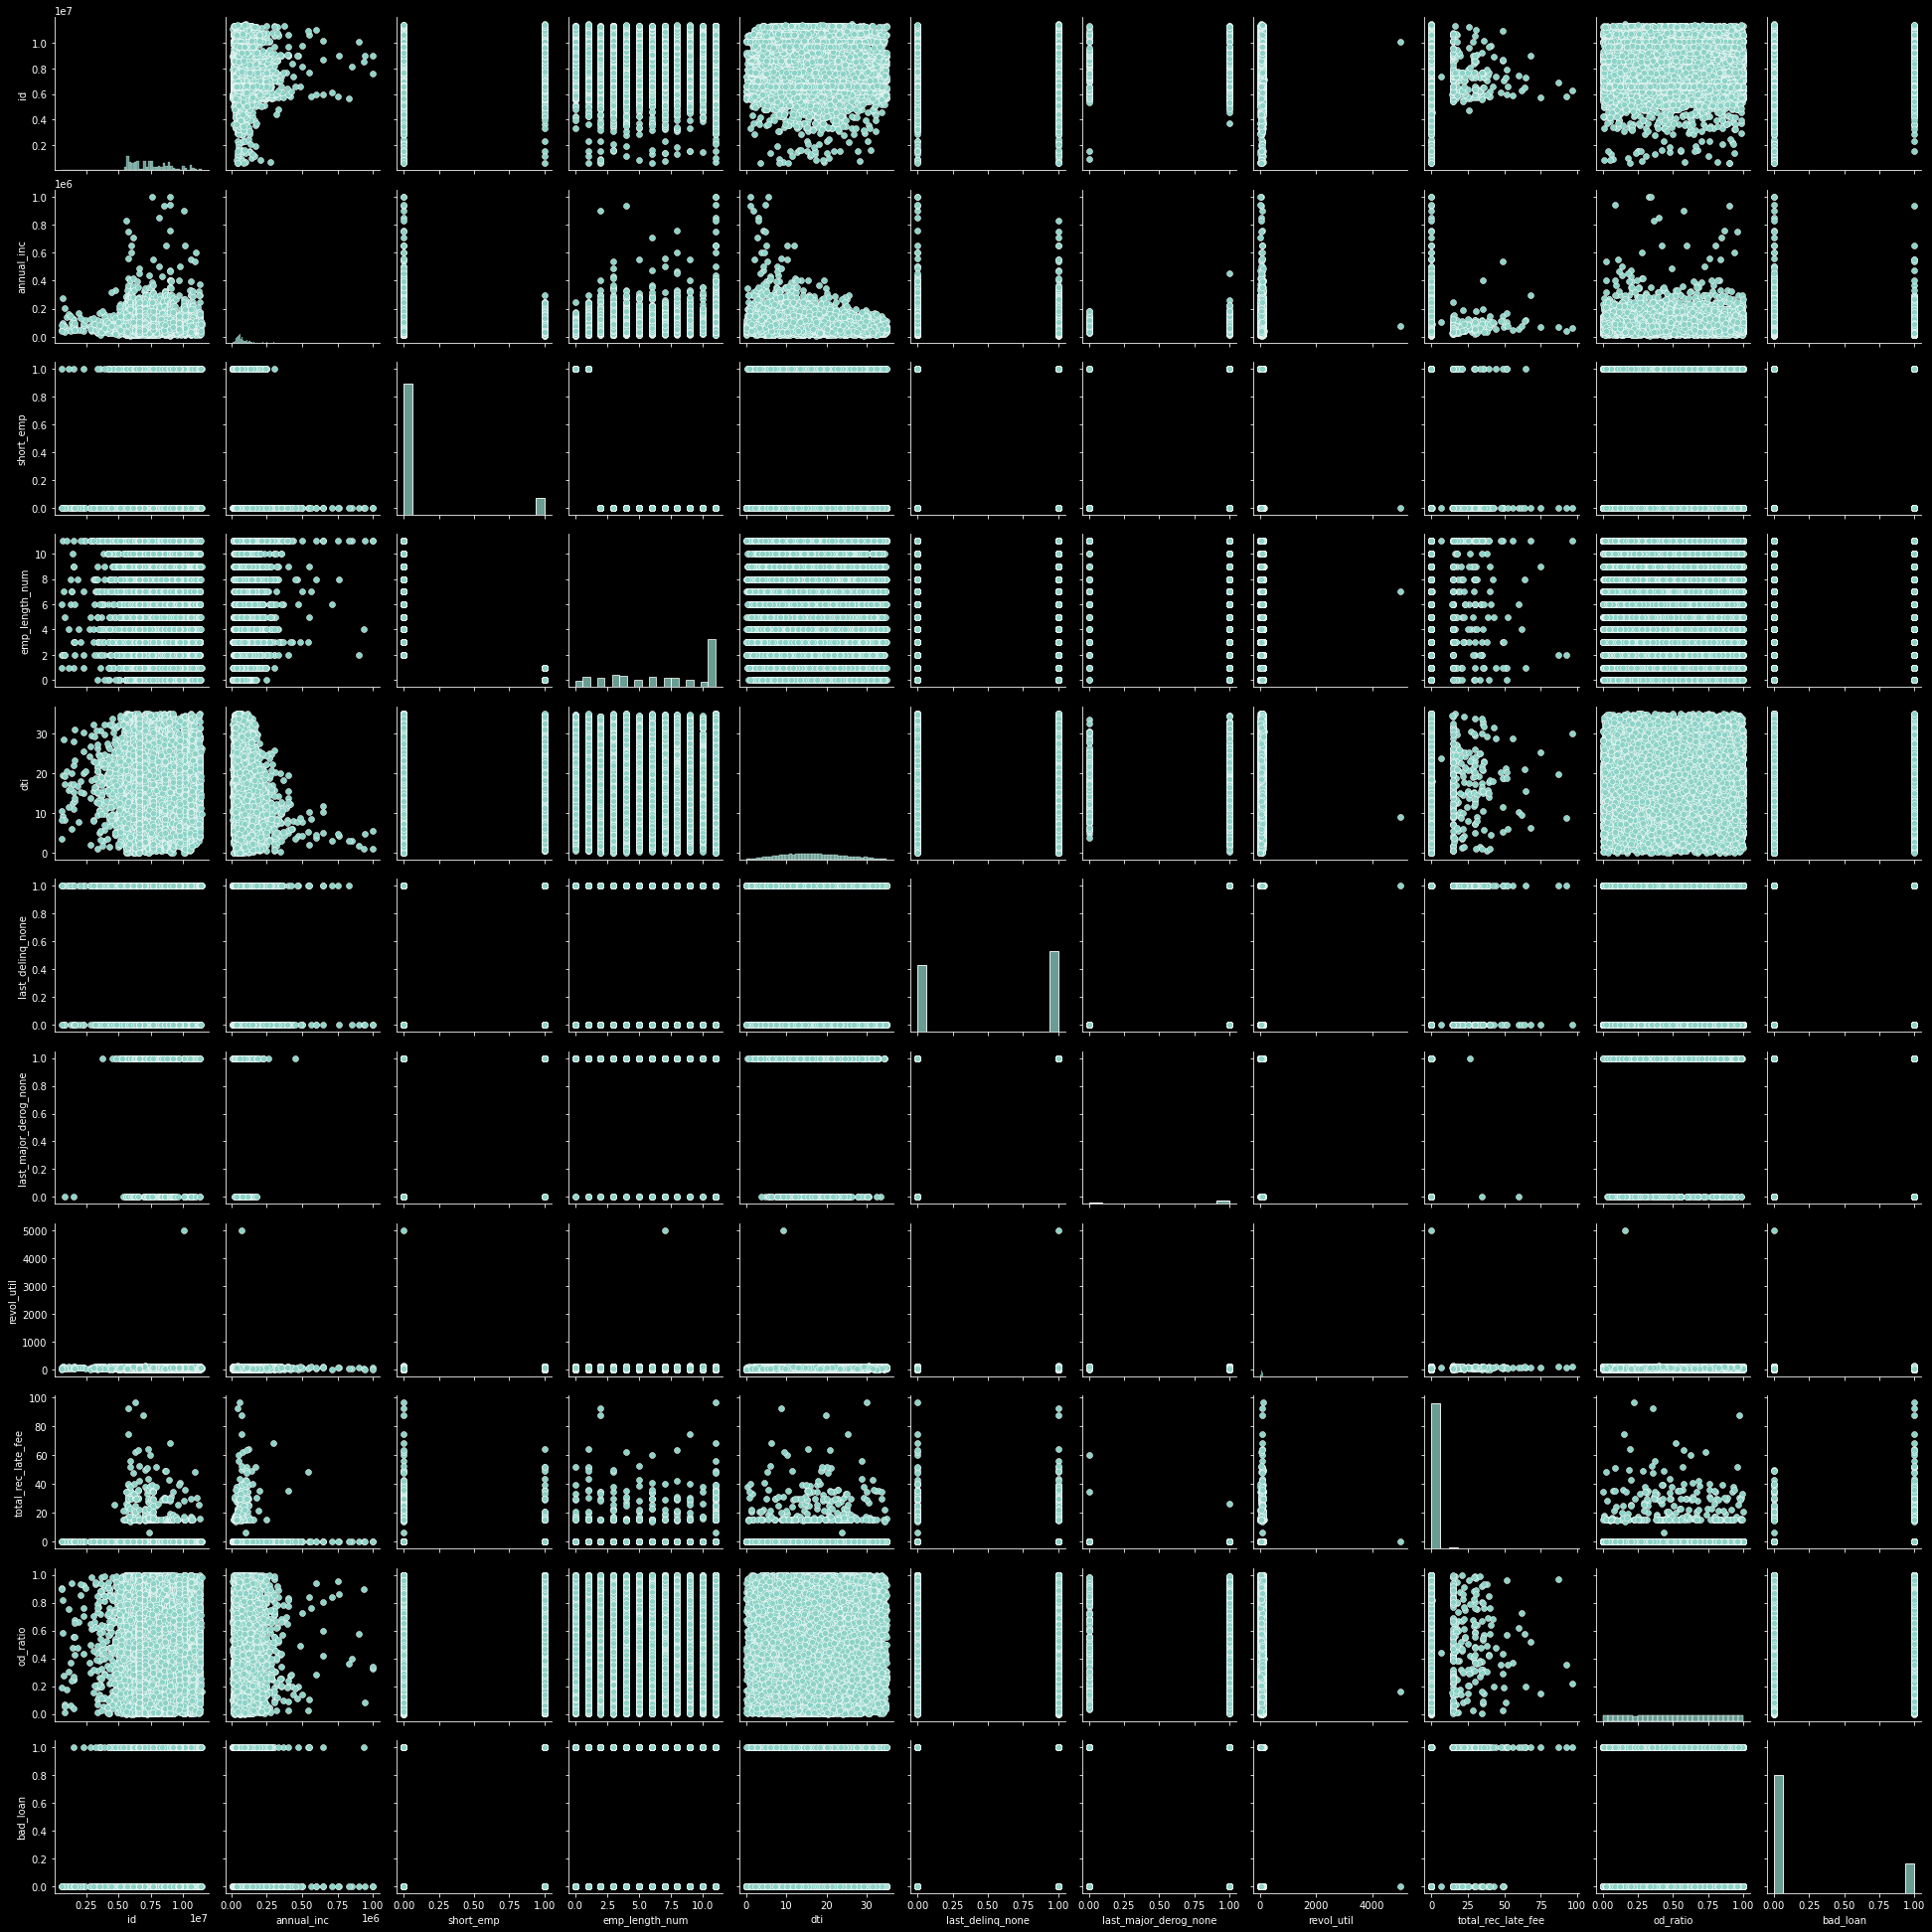

In [8]:
sns.pairplot(dataset)

In [9]:
dataset.drop(['last_major_derog_none'], axis=1, inplace=True)
dataset

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000.0,0,9,RENT,18.36,debt_consolidation,36 months,1,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,0,2,MORTGAGE,23.22,major_purchase,36 months,0,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,0,5,MORTGAGE,13.27,debt_consolidation,36 months,1,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,0,2,MORTGAGE,12.84,debt_consolidation,36 months,0,47.4,0.0,0.822980,0


C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bad_loan', ylabel='dti'>

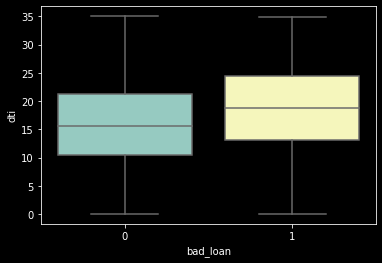

In [10]:
sns.boxplot('bad_loan','dti',data =dataset)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bad_loan', ylabel='annual_inc'>

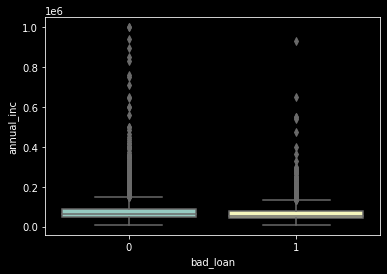

In [11]:
sns.boxplot('bad_loan','annual_inc',data =dataset)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bad_loan', ylabel='grade'>

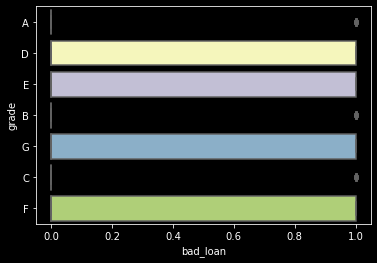

In [12]:
sns.boxplot('bad_loan','grade',data =dataset)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bad_loan', ylabel='short_emp'>

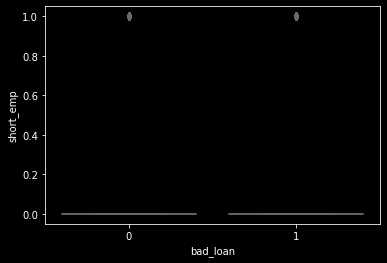

In [13]:
sns.boxplot('bad_loan','short_emp',data =dataset)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bad_loan', ylabel='emp_length_num'>

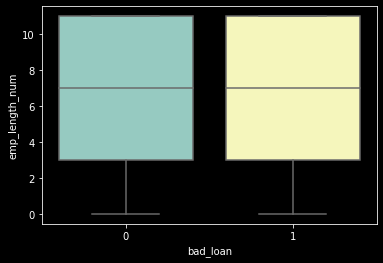

In [14]:
sns.boxplot('bad_loan','emp_length_num',data =dataset)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='bad_loan'>

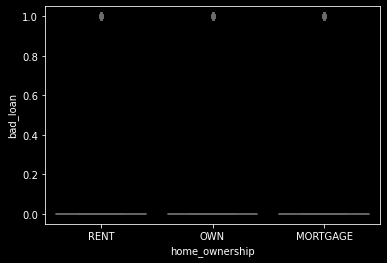

In [15]:
sns.boxplot('home_ownership','bad_loan',data =dataset)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bad_loan', ylabel='purpose'>

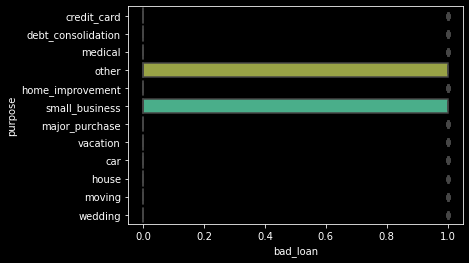

In [16]:
sns.boxplot('bad_loan','purpose',data =dataset)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bad_loan', ylabel='count'>

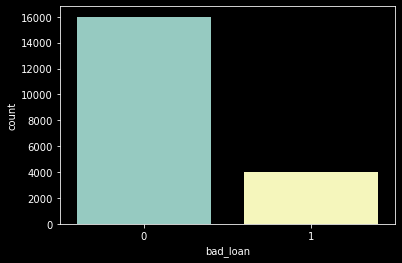

In [17]:
sns.countplot (dataset['bad_loan'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_delinq_none', ylabel='count'>

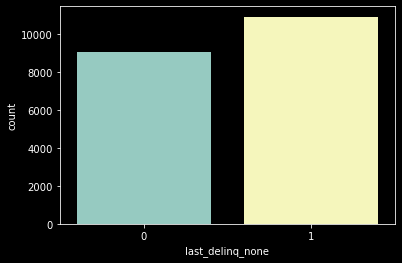

In [18]:
sns.countplot (dataset['last_delinq_none'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term', ylabel='count'>

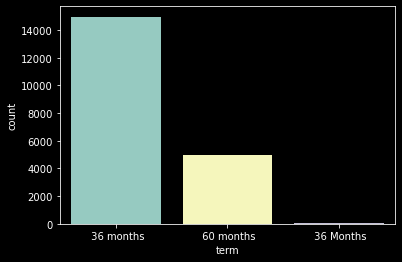

In [19]:
sns.countplot (dataset['term'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purpose', ylabel='count'>

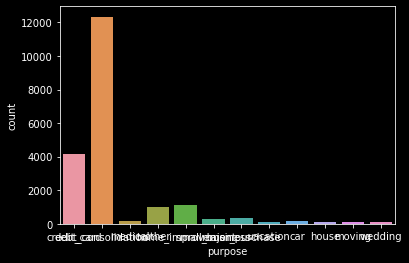

In [20]:
sns.countplot (dataset['purpose'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

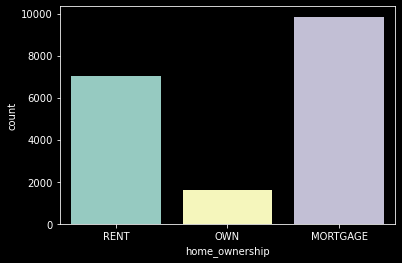

In [21]:
sns.countplot (dataset['home_ownership'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length_num', ylabel='count'>

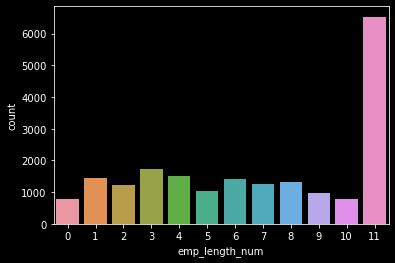

In [22]:
sns.countplot (dataset['emp_length_num'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='short_emp', ylabel='count'>

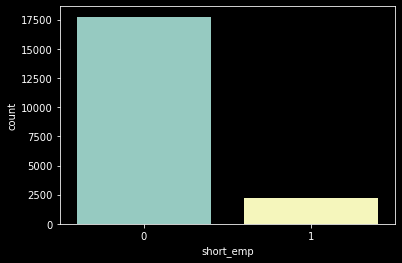

In [23]:
sns.countplot (dataset['short_emp'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

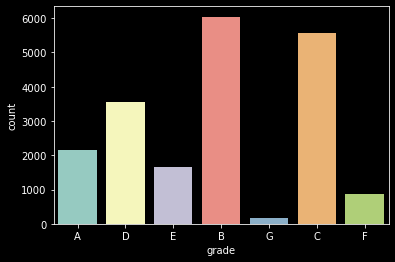

In [24]:
sns.countplot (dataset['grade'])

In [25]:
LE = LabelEncoder()
dataset['grade'] = LE.fit_transform(dataset['grade'])
dataset['home_ownership'] = LE.fit_transform(dataset['home_ownership'])
dataset['purpose'] = LE.fit_transform(dataset['purpose'])
dataset['term'] = LE.fit_transform(dataset['term'])

In [26]:
dataset

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,0,100000.0,1,1,2,26.27,1,1,1,43.2,0.0,0.160624,0
1,9604874,0,83000.0,0,4,1,5.39,1,1,0,21.5,0.0,0.810777,0
2,9684700,3,78000.0,0,11,0,18.45,2,2,1,46.3,0.0,0.035147,1
3,9695736,3,37536.0,0,6,0,12.28,6,2,0,10.7,0.0,0.534887,1
4,9795013,3,65000.0,0,11,0,11.26,2,1,0,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,1,27000.0,0,9,2,18.36,2,1,1,46.5,0.0,0.821782,1
19996,1576331,1,45000.0,0,2,0,23.22,5,1,0,46.2,0.0,0.652200,0
19997,6645736,1,104000.0,0,5,0,13.27,2,1,1,78.5,0.0,0.482555,0
19998,6625736,0,38400.0,0,2,0,12.84,2,1,0,47.4,0.0,0.822980,0


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   grade               20000 non-null  int32  
 2   annual_inc          20000 non-null  float64
 3   short_emp           20000 non-null  int64  
 4   emp_length_num      20000 non-null  int64  
 5   home_ownership      20000 non-null  int32  
 6   dti                 19846 non-null  float64
 7   purpose             20000 non-null  int32  
 8   term                20000 non-null  int32  
 9   last_delinq_none    20000 non-null  int64  
 10  revol_util          20000 non-null  float64
 11  total_rec_late_fee  20000 non-null  float64
 12  od_ratio            20000 non-null  float64
 13  bad_loan            20000 non-null  int64  
dtypes: float64(5), int32(4), int64(5)
memory usage: 1.8 MB


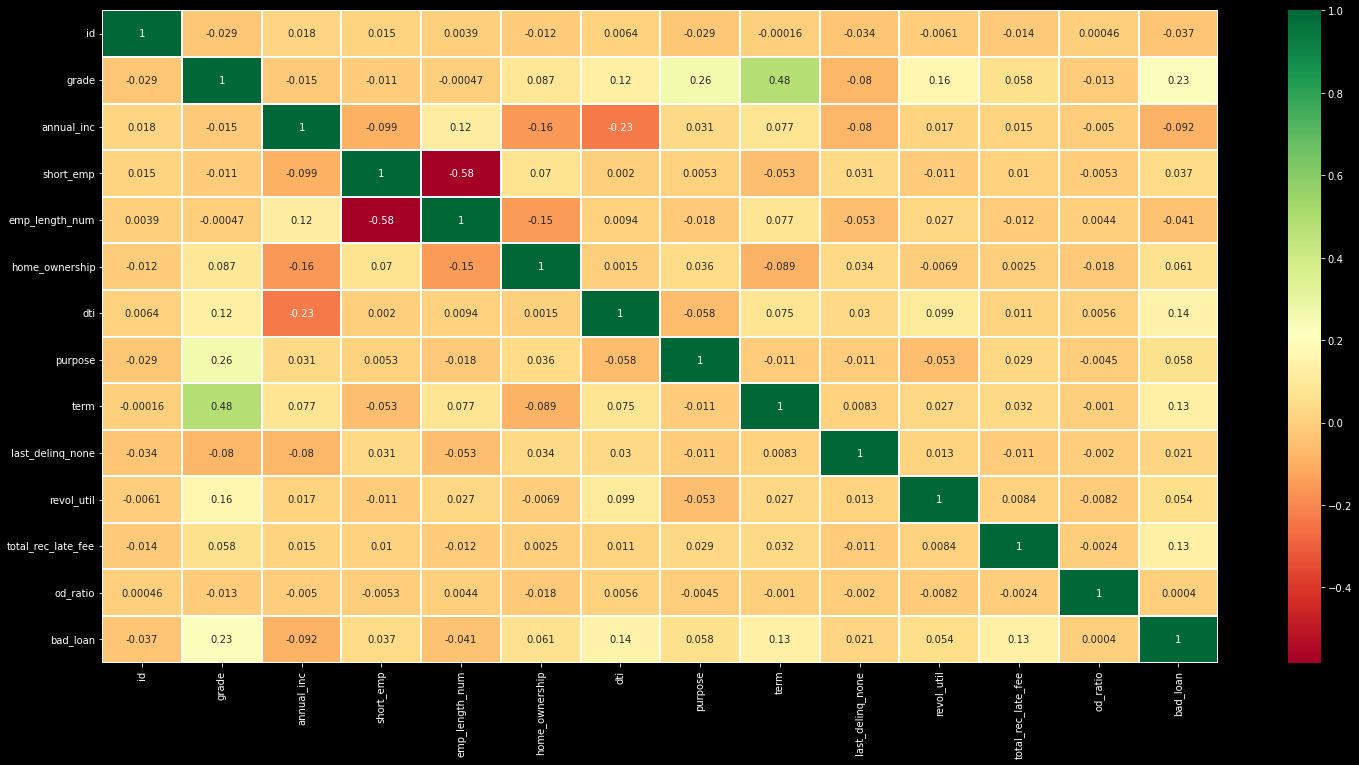

In [28]:
plt.figure(figsize=(25, 12))
corrmat = dataset.corr().head(20)
top_corr_features = corrmat.index
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,linewidth=.10,cmap="RdYlGn")

<AxesSubplot:>

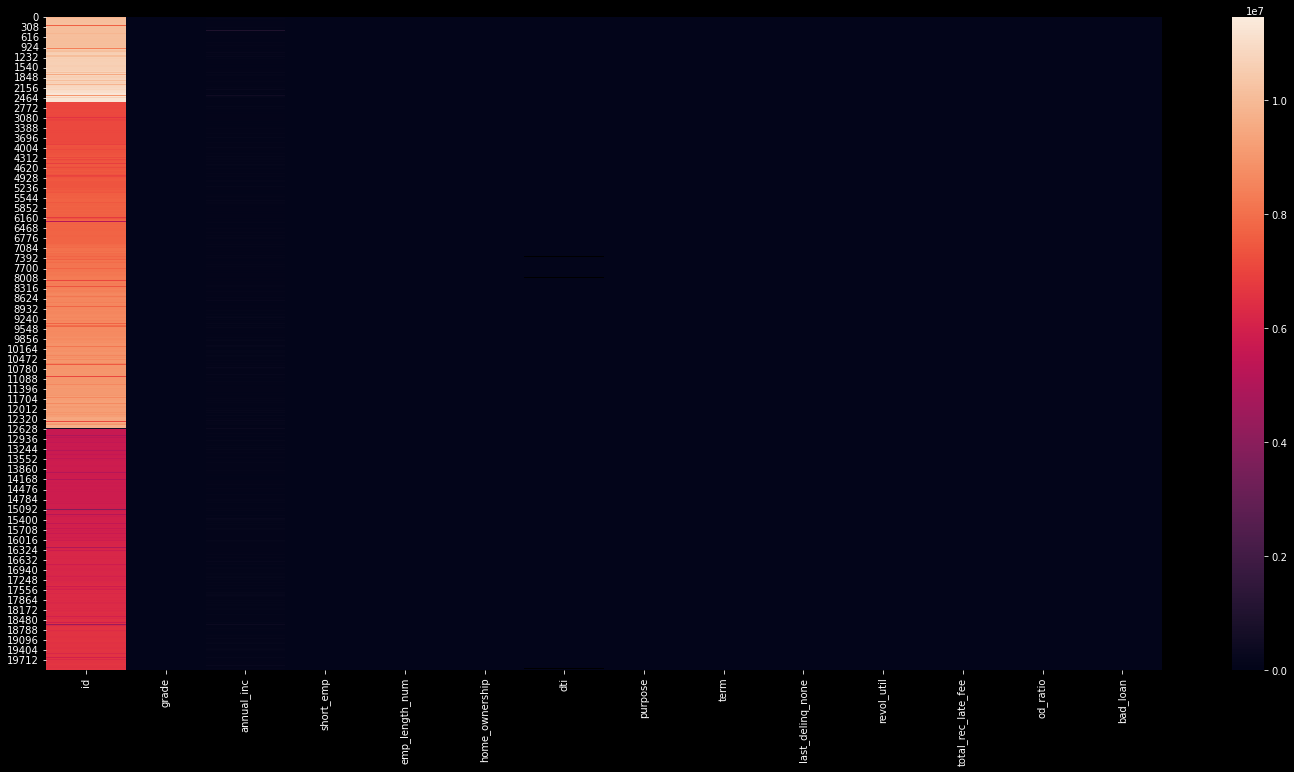

In [29]:
plt.figure(figsize=(25, 12))
sns.heatmap(dataset)

In [30]:
x = dataset.iloc[:,:-1].values
x

array([[1.14546410e+07, 0.00000000e+00, 1.00000000e+05, ...,
        4.32000000e+01, 0.00000000e+00, 1.60624077e-01],
       [9.60487400e+06, 0.00000000e+00, 8.30000000e+04, ...,
        2.15000000e+01, 0.00000000e+00, 8.10776768e-01],
       [9.68470000e+06, 3.00000000e+00, 7.80000000e+04, ...,
        4.63000000e+01, 0.00000000e+00, 3.51471746e-02],
       ...,
       [6.64573600e+06, 1.00000000e+00, 1.04000000e+05, ...,
        7.85000000e+01, 0.00000000e+00, 4.82554646e-01],
       [6.62573600e+06, 0.00000000e+00, 3.84000000e+04, ...,
        4.74000000e+01, 0.00000000e+00, 8.22980066e-01],
       [6.62568500e+06, 1.00000000e+00, 1.50000000e+05, ...,
        4.07000000e+01, 0.00000000e+00, 2.01388185e-01]])

In [31]:
y = dataset.iloc[:,-1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
imputer = SimpleImputer (missing_values = np.NaN , strategy = 'mean')
imputer = imputer.fit(x[:,6:7])
x[:,6:7] = imputer.transform(x[:,6:7])

In [34]:
SC = StandardScaler()
x[:,0:13] = SC.fit_transform(x[:,0:13])

In [35]:
df = pd.DataFrame(x,columns = ['id','grade','annual_inc','short_emp','emp_length_num','home_ownership','dti','purpose','term','last_delinq_none','revol_util','total_rec_late_fee','od_ratio'])
df

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio
0,2.400653,-1.496242,0.589645,2.808717,-1.542446,0.926507,1.281326,-0.744517,-0.569946,0.910764,-0.302926,-0.09349,-1.194963
1,1.251411,-1.496242,0.213517,-0.356034,-0.747562,-0.008886,-1.481910,-0.744517,-0.569946,-1.097979,-0.818165,-0.09349,1.064764
2,1.301006,0.761952,0.102891,-0.356034,1.107167,-0.944279,0.246436,-0.229779,1.724983,0.910764,-0.229320,-0.09349,-1.631081
3,1.307862,0.761952,-0.792381,-0.356034,-0.217639,-0.944279,-0.570095,1.829172,1.724983,-1.097979,-1.074597,-0.09349,0.105857
4,1.369542,0.761952,-0.184736,-0.356034,1.107167,-0.944279,-0.705080,-0.229779,-0.569946,-1.097979,-0.967750,-0.09349,-1.174539
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.618187,-0.743510,-1.025491,-0.356034,0.577245,0.926507,0.234525,-0.229779,-0.569946,0.910764,-0.224572,-0.09349,1.103016
19996,-3.736647,-0.743510,-0.627239,-0.356034,-1.277484,-0.944279,0.877692,1.314434,-0.569946,-1.097979,-0.231695,-0.09349,0.513601
19997,-0.587074,-0.743510,0.678145,-0.356034,-0.482601,-0.944279,-0.439079,-0.229779,-0.569946,0.910764,0.535227,-0.09349,-0.076033
19998,-0.599499,-1.496242,-0.773265,-0.356034,-1.277484,-0.944279,-0.495985,-0.229779,-0.569946,-1.097979,-0.203202,-0.09349,1.107179


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  float64
 1   grade               20000 non-null  float64
 2   annual_inc          20000 non-null  float64
 3   short_emp           20000 non-null  float64
 4   emp_length_num      20000 non-null  float64
 5   home_ownership      20000 non-null  float64
 6   dti                 20000 non-null  float64
 7   purpose             20000 non-null  float64
 8   term                20000 non-null  float64
 9   last_delinq_none    20000 non-null  float64
 10  revol_util          20000 non-null  float64
 11  total_rec_late_fee  20000 non-null  float64
 12  od_ratio            20000 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


<AxesSubplot:>

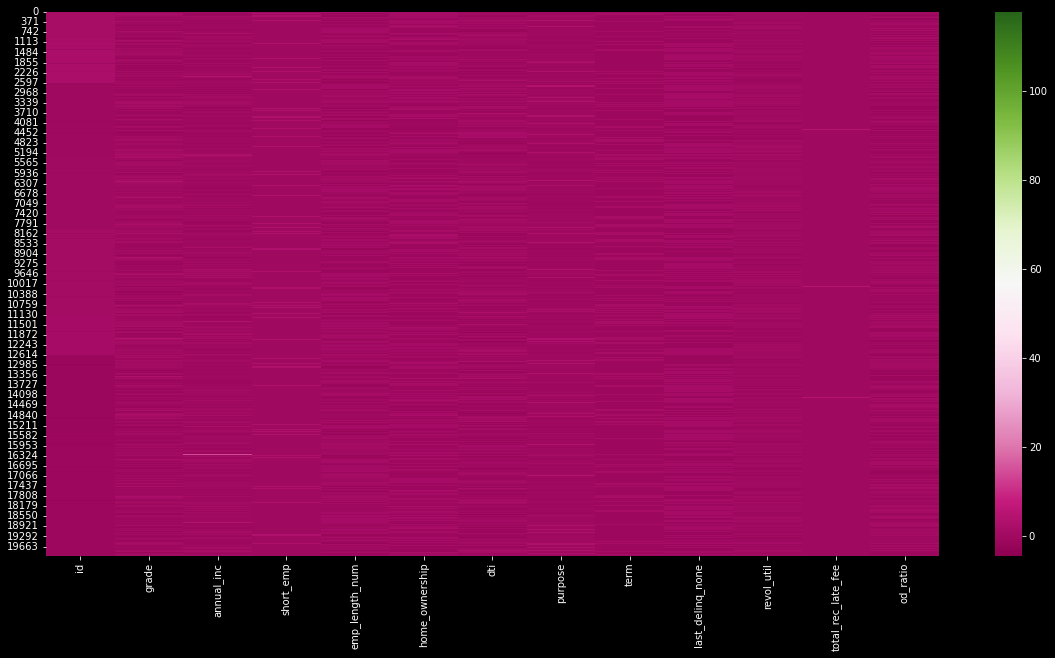

In [37]:
plt.figure(figsize=(20, 10))
sns.heatmap(df,cmap="PiYG")

In [38]:
X = df.values

In [39]:
x_train,x_test,y_train,y_test = train_test_split (X ,y ,test_size = 0.2 ,random_state = 0)

In [40]:
x_train

array([[-0.88312719,  1.51468349, -0.42811229, ...,  0.50673492,
        -0.09349026, -0.8666973 ],
       [-0.87707023,  2.26741476, -0.01879705, ...,  0.52098115,
        -0.09349026,  0.1692145 ],
       [ 1.56527361,  1.51468349,  3.28891262, ...,  0.06510176,
        -0.09349026, -1.42578347],
       ...,
       [ 0.7296261 ,  0.00922096,  0.36839305, ...,  0.69431029,
        -0.09349026,  1.00956425],
       [ 0.86824471,  0.76195222, -0.36173684, ..., -0.05361683,
        -0.09349026,  1.64540225],
       [-0.30734748,  1.51468349, -0.51661288, ...,  0.59933542,
        -0.09349026,  0.20987019]])

In [41]:
x_test

array([[-0.63486014,  0.76195222, -0.69361407, ...,  0.06272739,
        -0.09349026, -0.20940169],
       [-0.15523755,  0.76195222, -0.02985962, ..., -0.12247361,
        -0.09349026, -1.67197228],
       [-0.88499666, -1.49624158,  2.13840491, ..., -1.01523742,
        -0.09349026,  0.16748921],
       ...,
       [ 0.74830893,  0.76195222,  0.81089601, ...,  0.37851884,
        -0.09349026, -0.10997881],
       [-1.12315345, -1.49624158, -0.62723862, ..., -0.81816455,
        -0.09349026,  0.88740707],
       [ 0.60103512,  0.00922096,  0.43476849, ..., -0.21269974,
        -0.09349026,  1.26145612]])

In [42]:
y_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [43]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# SVM

In [44]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3180
           1       0.79      0.04      0.07       820

    accuracy                           0.80      4000
   macro avg       0.80      0.52      0.48      4000
weighted avg       0.80      0.80      0.72      4000



[[3172    8]
 [ 789   31]]


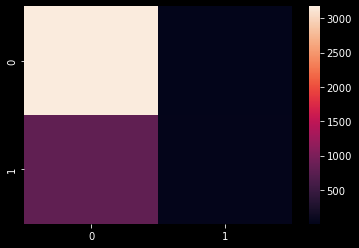

In [46]:
CM = confusion_matrix (y_test,y_pred)
sns.heatmap(CM)
print (CM)

In [47]:
df_comp = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
3995,0,0
3996,1,0
3997,0,0
3998,0,0


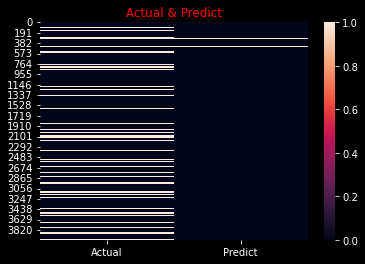

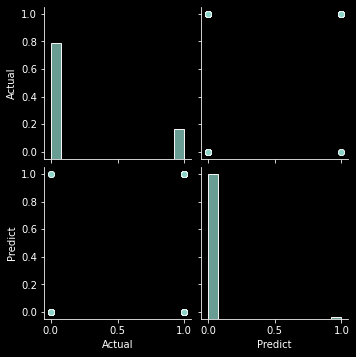

In [48]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp)
sns.pairplot(df_comp)

In [49]:
print ('y_test = ',y_test.sum())
print ('y_pred = ',y_pred.sum())

y_test =  820
y_pred =  39


# Random Forest Classifier

In [50]:
RFC=RandomForestClassifier(n_estimators=2000,random_state=0)
RFC.fit(x_train,y_train)
y_pred_2 = RFC.predict(x_test)
y_pred_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      3180
           1       0.53      0.08      0.14       820

    accuracy                           0.80      4000
   macro avg       0.67      0.53      0.51      4000
weighted avg       0.75      0.80      0.73      4000



# K Neighbors Classifier

In [52]:
KNN=KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train,y_train)
y_pred_3 = KNN.predict(x_test)
y_pred_3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      3180
           1       0.49      0.08      0.14       820

    accuracy                           0.79      4000
   macro avg       0.65      0.53      0.51      4000
weighted avg       0.74      0.79      0.73      4000



# XG Boost Classifier

In [54]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
xgb_model.fit(x_train,y_train)
y_pred_4 = xgb_model.predict(x_test)
y_pred_4

C:\Users\mahmo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
print(classification_report(y_test,y_pred_4))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      3180
           1       0.44      0.13      0.20       820

    accuracy                           0.79      4000
   macro avg       0.62      0.54      0.54      4000
weighted avg       0.73      0.79      0.74      4000

